In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

from matplotlib import rc

import mplcyberpunk
plt.style.use('cyberpunk')
warnings.filterwarnings("ignore")

rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', size=12)
%matplotlib inline

In [104]:
data_path = '/Users/tastebread/Desktop/kaggle/bike-sharing-demand/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
samplesubmission = pd.read_csv(data_path + 'sampleSubmission.csv')



In [105]:
print(train.shape, test.shape)
display(train.head(5))
display(test.head(5))
display(samplesubmission.head(5))
"""
datetime : 기록일시(1시간간격)
season : 계절(1:봄,2:여름,3:가을,4:겨울)
holiday : 공휴일 여부(0: 공휴일 아님, 1: 공휴일)
workingday : 근무일 여부(0: 근무일 아님, 1: 근무일) * 주말과 공휴일이 아니면 근무일이라고 간주
weather : 날씨(1:맑음, 2: 옅은 안개,약간흐림, 3:약간의 눈, 약간의 비와 천둥 번개, 흐림, 4: 폭우와 천둥 번개, 눈과 짙은 안개) *숫자가 클수록 날씨가 안좋음
temp : 실제 온도
atemp : 체감 온도
humidity : 상대 습도
windspeed : 풍속
casual : 등록되지 않은 사용자 수
registered : 등록된 사용자 수
count : 자전거 대여 수량 (타겟피쳐)
"""

(10886, 12) (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


'\ndatetime : 기록일시(1시간간격)\nseason : 계절(1:봄,2:여름,3:가을,4:겨울)\nholiday : 공휴일 여부(0: 공휴일 아님, 1: 공휴일)\nworkingday : 근무일 여부(0: 근무일 아님, 1: 근무일) * 주말과 공휴일이 아니면 근무일이라고 간주\nweather : 날씨(1:맑음, 2: 옅은 안개,약간흐림, 3:약간의 눈, 약간의 비와 천둥 번개, 흐림, 4: 폭우와 천둥 번개, 눈과 짙은 안개) *숫자가 클수록 날씨가 안좋음\ntemp : 실제 온도\natemp : 체감 온도\nhumidity : 상대 습도\nwindspeed : 풍속\ncasual : 등록되지 않은 사용자 수\nregistered : 등록된 사용자 수\ncount : 자전거 대여 수량 (타겟피쳐)\n'

In [106]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


None

In [107]:
print(train['datetime'][100]) # datetime 100번째 원소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간
print("\n")
print("날짜 문자열을 다시 연,월,일로 나눠보기")
print("----------------------------------------------------------------")
print(train['datetime'][100].split()[0].split()) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split("-")) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split("-")[0]) # 연도
print(train['datetime'][100].split()[0].split("-")[1]) # 월
print(train['datetime'][100].split()[0].split("-")[2]) # 일
print("\n")
print("시간 문자열을 다시 시,분,초로 나눠보기")
print("----------------------------------------------------------------")
print(train['datetime'][100].split()[1].split()) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(":")) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(":")[0]) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(":")[1]) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(":")[2]) # "-" 기준으로 문자열 나누기

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


날짜 문자열을 다시 연,월,일로 나눠보기
----------------------------------------------------------------
['2011-01-05']
['2011', '01', '05']
2011
01
05


시간 문자열을 다시 시,분,초로 나눠보기
----------------------------------------------------------------
['09:00:00']
['09', '00', '00']
09
00
00


In [108]:
"""
판다스 apply 함수를 사용해서 datetime 로직에 적용해 날짜,연도,월,일,시,분,초 피처 생성
"""
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

#연도,월,일,시,분,초
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[2])

train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


In [109]:
#datetime 라이브러리를 사용해 요일피쳐 생성
from datetime import datetime
import calendar

print(train['date'][100])
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) # 정수로 요일 변환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) #문자열로 요일 변환

train['Weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [110]:
#season, weather 피처는 범주형 데이터인데 숫자로 표현되어 있어서 map()함수를 사용하여 문자열로 변환

train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstorm',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [111]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,Weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


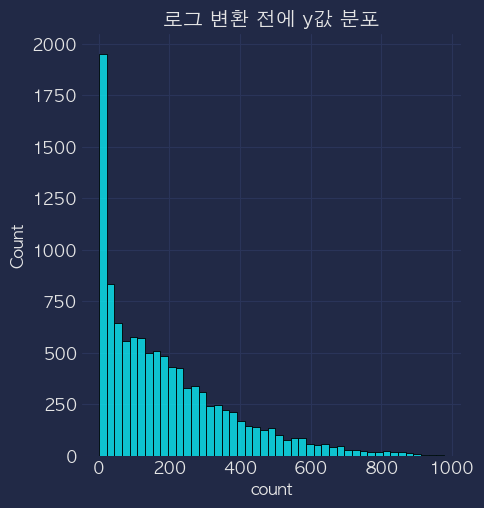

Text(0.5, 1.0, '로그 변환후의 y값 분포')

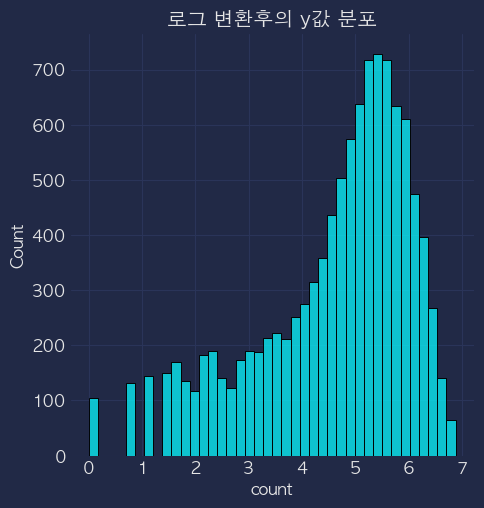

In [112]:
sns.displot(x='count',data=train)
plt.title("로그 변환 전에 y값 분포")
plt.show()
#왼쪽으로 많이 편향되어 있으므로 데이터분포를 정규분포에 가깝게 만들기 위해 가장 많이 사용하는 방법은 로그변환이다
#타겟값이 정규분포에 가까울수록 회귀 모델 성능이 좋아진다.
#다만 마지막에 지수변환을 하여 실제 타깃값인 count로 복원해야한다.
sns.displot(np.log(train['count']))
plt.title("로그 변환후의 y값 분포")

Text(0.5, 1.0, '초 에 따른 자전거 대여 수요')

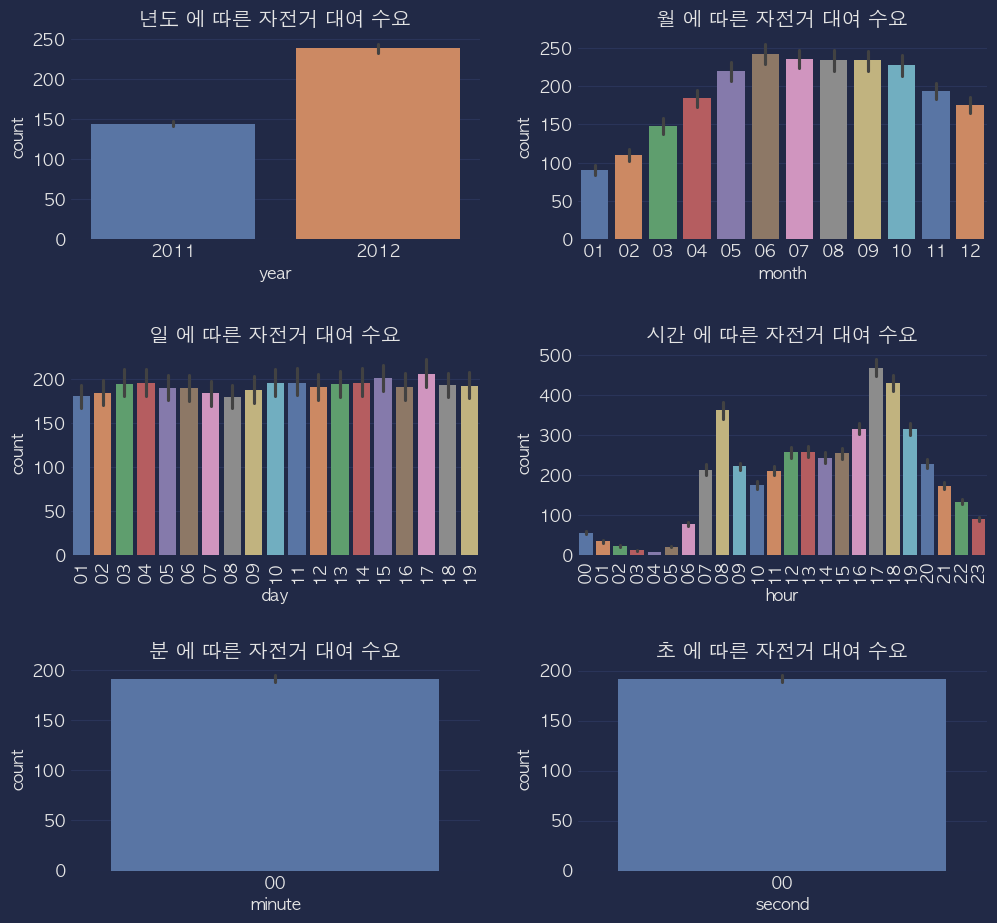

In [113]:
#연도,월,일,시,분,초별로 여섯 가지의 평균 대여 수량을 막대그래프로 그려보기
#한번에 여러개의 그래프를 그리기

#Step1 : m행 n열 Figure 준비하기

fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10,9)) # 3행 2열, 크기는(10,9) Figure 사이즈 지정
plt.tight_layout(h_pad=5,w_pad=3)# 그래프 사이의 여백확보

#Step2 :각 축에 서브플롯 할당

sns.barplot(x='year',y='count',data=train, palette='deep', ax=ax[0,0])
sns.barplot(x='month',y='count',data=train, palette='deep', ax=ax[0,1])
sns.barplot(x='day',y='count',data=train, palette='deep', ax=ax[1,0])
sns.barplot(x='hour',y='count',data=train, palette='deep', ax=ax[1,1])
sns.barplot(x='minute',y='count',data=train, palette='deep', ax=ax[2,0])
sns.barplot(x='second',y='count',data=train, palette='deep', ax=ax[2,1])

#Step3 : 각 타이틀 이름 만들기, 세부사항 수정
ax[0,0].set_title('년도 에 따른 자전거 대여 수요')
ax[0,1].set_title('월 에 따른 자전거 대여 수요')

ax[1,0].set_title('일 에 따른 자전거 대여 수요')
ax[1,0].tick_params(axis='x',labelrotation=90)
ax[1,1].set_title('시간 에 따른 자전거 대여 수요')
ax[1,1].tick_params(axis='x',labelrotation=90)

ax[2,0].set_title('분 에 따른 자전거 대여 수요')
ax[2,1].set_title('초 에 따른 자전거 대여 수요')


Text(0.5, 1.0, '근무일 자전거 대여 수요(0->근무일X,1->근무일)')

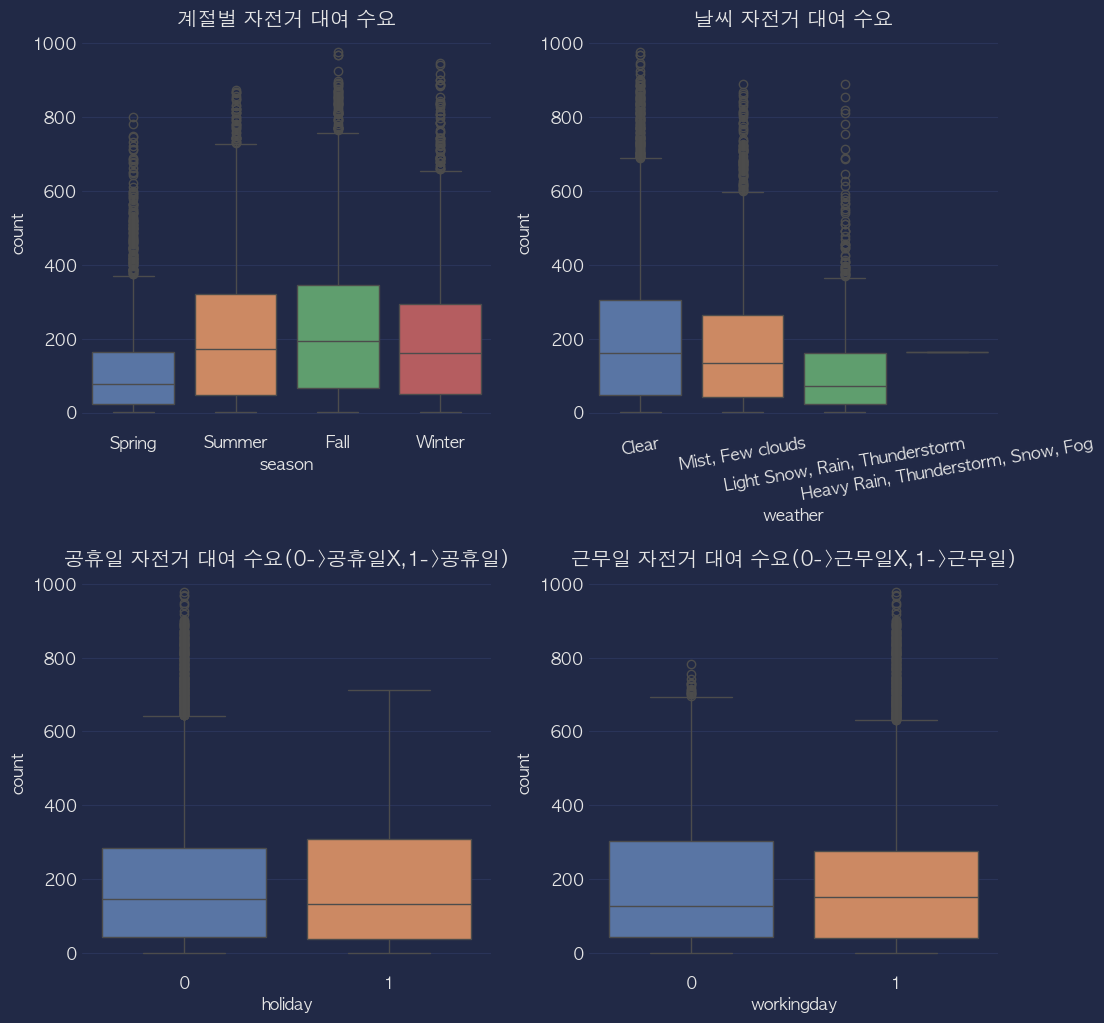

In [114]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
plt.tight_layout(h_pad=7,w_pad=3)

sns.boxplot(x='season',y='count',data=train, palette='deep', ax=ax[0,0])
sns.boxplot(x='weather',y='count',data=train,palette='deep', ax=ax[0,1])
sns.boxplot(x='holiday',y='count',data=train,palette='deep', ax=ax[1,0])
sns.boxplot(x='workingday',y='count',data=train,palette='deep', ax=ax[1,1])

ax[0,0].set_title("계절벌 자전거 대여 수요")
ax[0,1].set_title("날씨 자전거 대여 수요")
ax[0,1].tick_params(axis='x',labelrotation=10)
ax[1,0].set_title("공휴일 자전거 대여 수요(0->공휴일X,1->공휴일)")
ax[1,1].set_title("근무일 자전거 대여 수요(0->근무일X,1->근무일)")

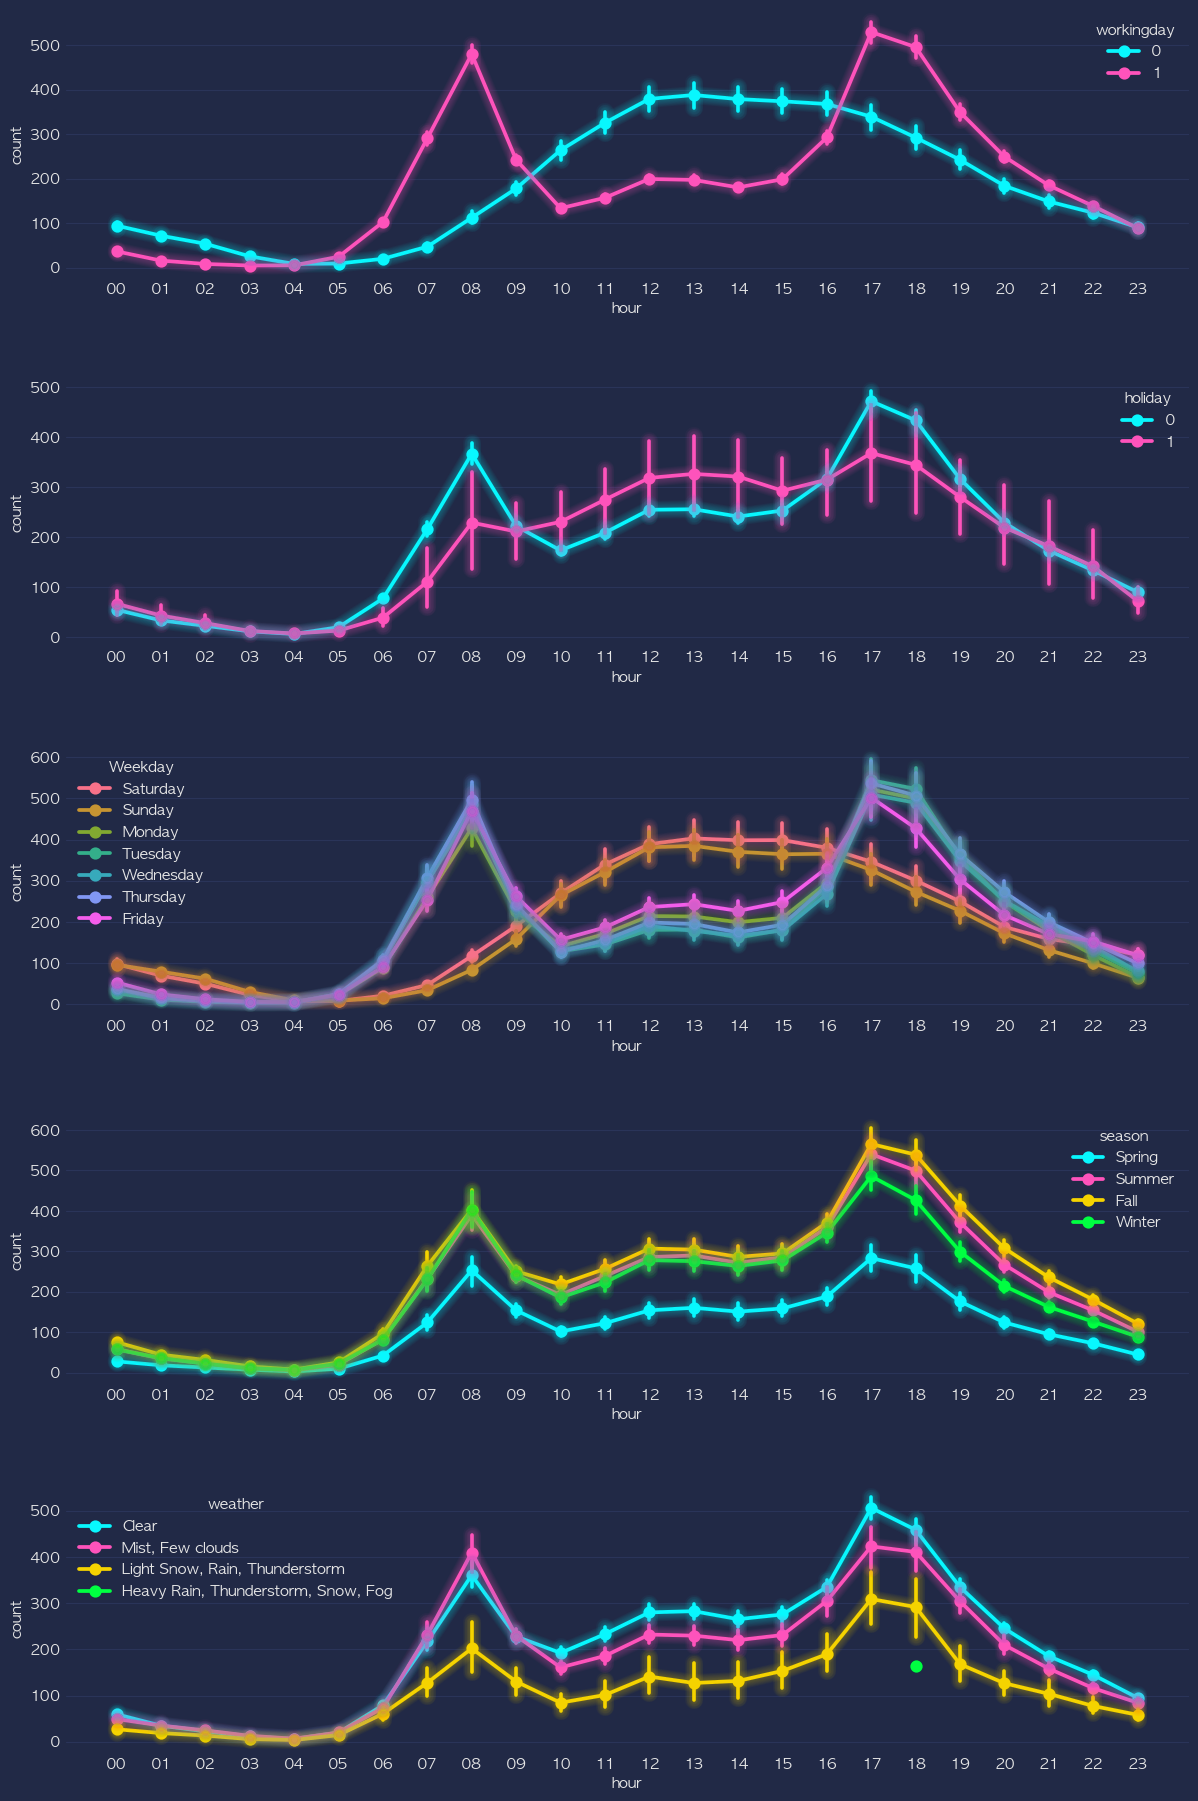

In [115]:
mpl.rc('font', size=11)
fig,ax = plt.subplots(nrows=5,figsize=(12,18))
plt.tight_layout(h_pad=5,w_pad=3)


sns.pointplot(x='hour',y='count',data=train,hue='workingday',ax=ax[0])
sns.pointplot(x='hour',y='count',data=train,hue='holiday',ax=ax[1])
sns.pointplot(x='hour',y='count',data=train,hue='Weekday',ax=ax[2])
sns.pointplot(x='hour',y='count',data=train,hue='season',ax=ax[3])
sns.pointplot(x='hour',y='count',data=train,hue='weather',ax=ax[4])

mplcyberpunk.make_lines_glow(ax[0])
mplcyberpunk.make_lines_glow(ax[1])
mplcyberpunk.make_lines_glow(ax[2])
mplcyberpunk.make_lines_glow(ax[3])
mplcyberpunk.make_lines_glow(ax[4])




폭우,폭설이 내릴때 대여건수가 있다 이런 이상치는 제거하면 모델 성능이 좋아지는 경우도 있다.

<AxesSubplot:xlabel='humidity', ylabel='count'>

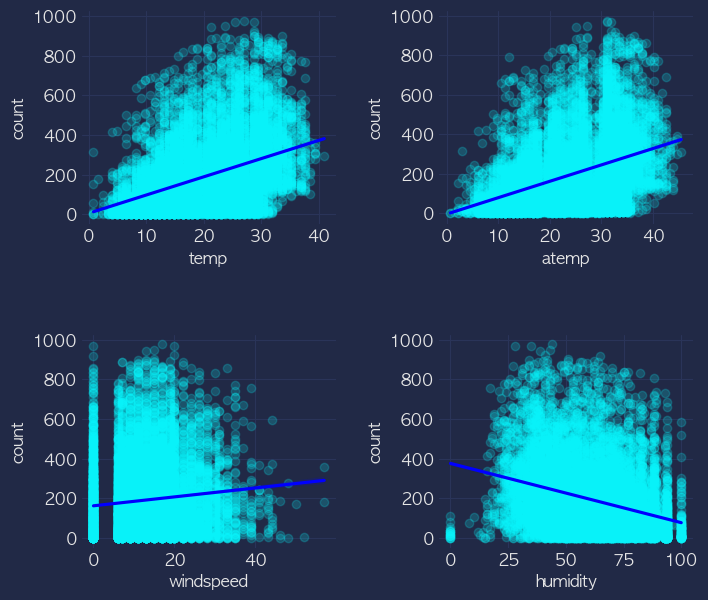

In [124]:
#이번엔 회귀선을 포함한 산점도 그래프 그려보기
#수치형 데이터인 온도,체감 온도, 풍속, 습도별 대여 수량

mpl.rc('font', size=12)
fig,ax = plt.subplots(2,2,figsize=(7,6))
plt.tight_layout(h_pad=5,w_pad=3)

sns.regplot(x='temp',y='count',data=train,ax=ax[0,0],scatter_kws={'alpha' : 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp',y='count',data=train,ax=ax[0,1],scatter_kws={'alpha' : 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed',y='count',data=train,ax=ax[1,0],scatter_kws={'alpha' : 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity',y='count',data=train,ax=ax[1,1],scatter_kws={'alpha' : 0.2}, line_kws={'color': 'blue'})

온도, 체감온도가 높을수록 대여량이 많다.
습도가 낮을수록 대여량이 많다
풍속은 속도가 높을수록 대여량이 많지만 0인 데이터가 꽤 많다 이런 경우 관측치가 없거나, 또는 오류로 인해 0으로 기록되어있을 가능성이 높다.

In [127]:
#히트맵을 통한 수치형 데이터의 상관관계 알아보기

corr = train[['temp','atemp','humidity','windspeed','count']].corr()
corr
fig,ax = plt.subplots()

sns.heatmap(corr,annot=True)


,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000
